In [1]:
import pandas as pd
import numpy as np
import missingno as ms
from keras.models import Sequential
from keras.layers import Dense

C:\Users\HP\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv("a.csv")

In [4]:
data.head()

,a,b,c,d,e,f,g,h,chemo
0,0.20,0.50,0.350,0.80,0.60,0.90,0.50,0.58,1
1,2.50,0.65,0.890,0.77,0.23,8.00,0.88,4.00,0
2,0.25,2.60,5.600,8.00,4.00,2.50,5.50,6.00,0
3,5.50,6.20,8.800,9.60,5.50,2.20,5.60,4.00,0
4,0.23,0.65,0.189,0.18,0.46,0.16,0.12,0.21,1


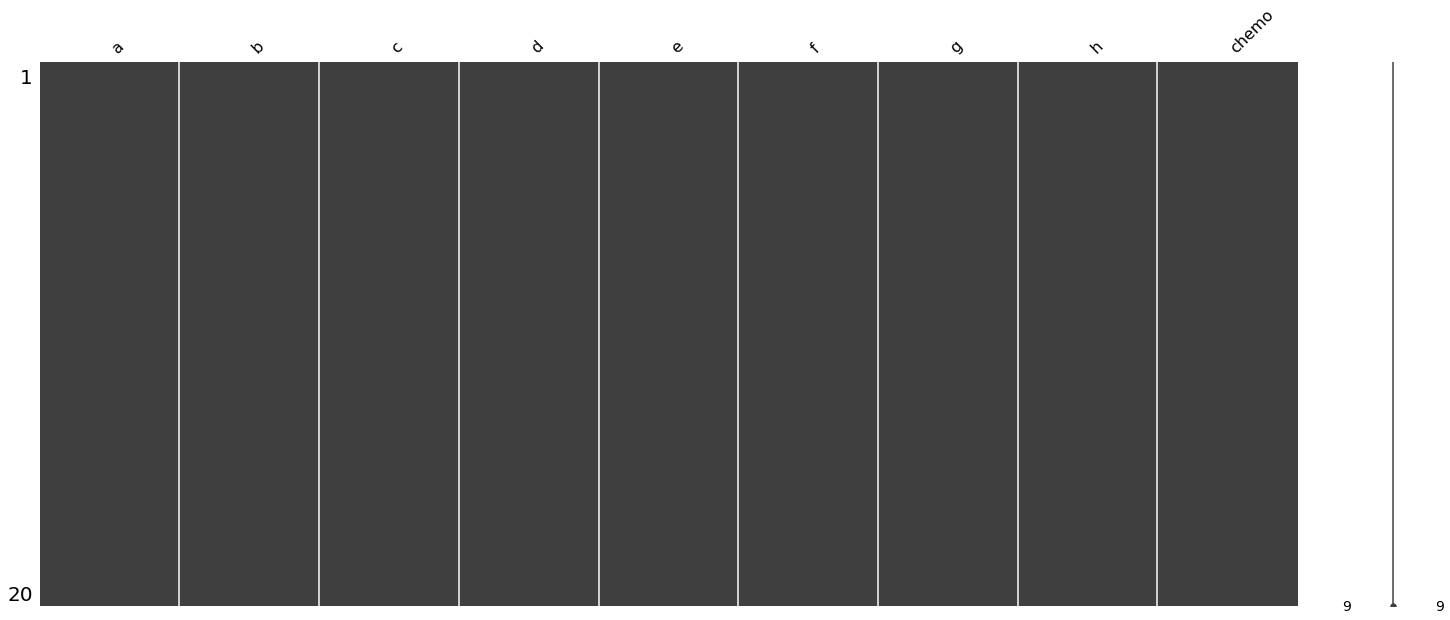

In [5]:
ms.matrix(data)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
a        20 non-null float64
b        20 non-null float64
c        20 non-null float64
d        20 non-null float64
e        20 non-null float64
f        20 non-null float64
g        20 non-null float64
h        20 non-null float64
chemo    20 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.5 KB


In [7]:
model  = Sequential()

In [8]:
model.add(Dense(5,input_dim=8,activation="relu"))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.add(Dense(6,activation="relu"))

In [11]:
model.add(Dense(1,activation="sigmoid"))

In [13]:
model.compile(loss="binary_crossentropy",optimizer="sgd",metrics=['accuracy'])

In [14]:
data.shape

(20, 9)

In [15]:
X_train = data[['a','b','c','d','e','f','g','h']][:15]

In [16]:
X_train

,a,b,c,d,e,f,g,h
0,0.20,0.500,0.350,0.800,0.60,0.90,0.50,0.58
1,2.50,0.650,0.890,0.770,0.23,8.00,0.88,4.00
2,0.25,2.600,5.600,8.000,4.00,2.50,5.50,6.00
3,5.50,6.200,8.800,9.600,5.50,2.20,5.60,4.00
4,0.23,0.650,0.189,0.180,0.46,0.16,0.12,0.21
5,5.40,0.650,0.980,8.900,7.80,0.56,5.80,0.49
6,0.56,0.890,0.590,0.550,0.66,0.49,0.89,0.78
7,2.00,8.000,9.700,4.800,6.20,5.70,5.90,5.60
8,0.69,0.589,0.590,0.350,0.18,0.49,0.68,0.46
9,6.20,5.500,5.300,6.300,8.88,4.90,6.30,2.50


In [17]:
y_train = data[['chemo']][:15]

In [18]:
y_train

,chemo
0,1
1,0
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [19]:
type(X_train)

pandas.core.frame.DataFrame

In [20]:
X_train = np.asarray(X_train)
type(X_train)

numpy.ndarray

In [21]:
y_train = np.asarray(y_train)

In [22]:
model.fit(X_train,y_train,epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
15/15 [==============================] - 0s 30ms/step - loss: 0.5286 - acc: 0.5333
Epoch 2/20
15/15 [==============================] - 0s 199us/step - loss: 0.5268 - acc: 0.5333
Epoch 3/20
15/15 [==============================] - 0s 328us/step - loss: 0.5252 - acc: 0.5333
Epoch 4/20
15/15 [==============================] - 0s 198us/step - loss: 0.5235 - acc: 0.5333
Epoch 5/20
15/15 [==============================] - 0s 466us/step - loss: 0.5219 - acc: 0.5333
Epoch 6/20
15/15 [==============================] - 0s 133us/step - loss: 0.5203 - acc: 0.5333
Epoch 7/20
15/15 [==============================] - 0s 230us/step - loss: 0.5188 - acc: 0.5333
Epoch 8/20
15/15 [==============================] - 0s 359us/step - loss: 0.5173 - acc: 0.5333
Epoch 9/20
15/15 [==============================] - 0s 204us/step - loss: 0.5158 - acc: 0.5333
Epoch 10/20
15/15 [==============================] - 0s 731us/step - loss: 0.5143 - acc: 0.5333
Ep

In [23]:
pred = model.predict(np.asarray(data[['a','b','c','d','e','f','g','h']][15:]))

In [24]:
pred

array([[0.13416389],
       [0.02033117],
       [0.4523696 ],
       [0.48463807],
       [0.47028282]], dtype=float32)

In [25]:
data[['chemo']][15:]

,chemo
15,0
16,0
17,1
18,1
19,1
